In [337]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import plotly
import plotly.express as px
import plotly.graph_objects as go

### Import Data

In [92]:
#Connect to a database
con = sqlite3.connect("my_db.db")

- Pageviews

In [93]:
## Read csv file
v=pd.read_csv("data_test_pageviews.csv")
v

,anonymous_id,logged_in,received_at,path,referrer
0,ad31b961-d67f-497c-9def-9193d518863a,False,2017-03-12 18:23:28.241,/artist/anish-kapoor,http://m.facebook.com
1,dd14cc5c-f31a-4591-974d-1233346b1999,False,2017-03-20 20:36:32.177,/artwork/vernon-fisher-happy-family,NaN
2,9b459a76-aaa3-44cd-9f0e-af7fb9829b2c,False,2017-03-14 05:19:47.852,/article/francesca-gavin-10-new-artists-to-wat...,https://www.google.ge/
3,cb745df7-c90d-4339-9519-960081515b8c,False,2017-03-14 02:50:29.697,/article/artsy-editorial-8-female-surrealists-...,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...
4,8b18968d-4e51-4e00-b60c-d80b1ad6a55c,False,2017-03-15 09:07:07.436,/article/artsy-editorial-why-these-7-artists-q...,https://www.facebook.com/
...,...,...,...,...,...
99995,d3916f78-16ec-4614-af92-8a29640566ce,True,2017-03-12 15:50:04.295,/,NaN
99996,fc6a5da2-0cc0-42f2-9040-74498c50f569,False,2017-03-23 11:11:23.208,/artists/artists-starting-with-s,https://www.artsy.net/artists/artists-starting...
99997,66948dd7-836b-4770-9ca4-719096c621ee,True,2017-03-13 11:27:32.482,/artwork/jean-baptiste-bernadet-untitled-vetiv...,https://www.artsy.net/artist/jean-baptiste-ber...
99998,cca44d19-d759-493a-a59e-0ef13ac4f129,False,2017-03-21 10:33:02.154,/jobs,https://www.artsy.net/


- Users

In [339]:
## Read csv file
u=pd.read_csv("dataset_test_user.csv")
u

,visitor_id,has_inquired,has_an_account,article_pageviews,artist_pageviews,artwork_pageviews
0,0,False,False,0.0,0.0,1.0
1,1,True,False,0.0,0.0,1.0
2,2,True,True,0.0,0.0,1.0
3,3,False,False,0.0,1.0,0.0
4,4,False,False,0.0,0.0,1.0
...,...,...,...,...,...,...
2606,2606,False,False,0.0,1.0,0.0
2607,2607,True,False,0.0,1.0,0.0
2608,2608,False,False,0.0,1.0,0.0
2609,2609,False,True,0.0,0.0,0.0


### Data Exploration and Treatment

PAGEVIEWS

In [95]:
v.dtypes

anonymous_id    object
logged_in         bool
received_at     object
path            object
referrer        object
dtype: object

- Date Type

In [96]:
## Covert the received_at to datetime
v['received_at'] = pd.to_datetime(v['received_at'])

##Check Dates Provided
v['received_at'].map(lambda t: t.date()).unique()

array([datetime.date(2017, 3, 12), datetime.date(2017, 3, 20),
       datetime.date(2017, 3, 14), datetime.date(2017, 3, 15),
       datetime.date(2017, 3, 25), datetime.date(2017, 3, 23),
       datetime.date(2017, 3, 24), datetime.date(2017, 3, 18),
       datetime.date(2017, 3, 16), datetime.date(2017, 3, 13),
       datetime.date(2017, 3, 21), datetime.date(2017, 3, 19),
       datetime.date(2017, 3, 17), datetime.date(2017, 3, 22)],
      dtype=object)

- Null Referrers

In [97]:
## Check referrers that are Null
len(v[v.referrer.isnull()])/len(v)

0.19965

In [98]:
## When referrer is NULL then 'Others'
v.referrer.fillna("others", inplace = True) 
v

,anonymous_id,logged_in,received_at,path,referrer
0,ad31b961-d67f-497c-9def-9193d518863a,False,2017-03-12 18:23:28.241,/artist/anish-kapoor,http://m.facebook.com
1,dd14cc5c-f31a-4591-974d-1233346b1999,False,2017-03-20 20:36:32.177,/artwork/vernon-fisher-happy-family,others
2,9b459a76-aaa3-44cd-9f0e-af7fb9829b2c,False,2017-03-14 05:19:47.852,/article/francesca-gavin-10-new-artists-to-wat...,https://www.google.ge/
3,cb745df7-c90d-4339-9519-960081515b8c,False,2017-03-14 02:50:29.697,/article/artsy-editorial-8-female-surrealists-...,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...
4,8b18968d-4e51-4e00-b60c-d80b1ad6a55c,False,2017-03-15 09:07:07.436,/article/artsy-editorial-why-these-7-artists-q...,https://www.facebook.com/
...,...,...,...,...,...
99995,d3916f78-16ec-4614-af92-8a29640566ce,True,2017-03-12 15:50:04.295,/,others
99996,fc6a5da2-0cc0-42f2-9040-74498c50f569,False,2017-03-23 11:11:23.208,/artists/artists-starting-with-s,https://www.artsy.net/artists/artists-starting...
99997,66948dd7-836b-4770-9ca4-719096c621ee,True,2017-03-13 11:27:32.482,/artwork/jean-baptiste-bernadet-untitled-vetiv...,https://www.artsy.net/artist/jean-baptiste-ber...
99998,cca44d19-d759-493a-a59e-0ef13ac4f129,False,2017-03-21 10:33:02.154,/jobs,https://www.artsy.net/


- Paths that are "/"

In [99]:
## Check Paths equal to '/'
len(v[v.path=='/'])/len(v)

0.04283

In [100]:
## When path is '/' then 'Homepage'
v.path=v.path.replace(['/'],'homepage')
v

,anonymous_id,logged_in,received_at,path,referrer
0,ad31b961-d67f-497c-9def-9193d518863a,False,2017-03-12 18:23:28.241,/artist/anish-kapoor,http://m.facebook.com
1,dd14cc5c-f31a-4591-974d-1233346b1999,False,2017-03-20 20:36:32.177,/artwork/vernon-fisher-happy-family,others
2,9b459a76-aaa3-44cd-9f0e-af7fb9829b2c,False,2017-03-14 05:19:47.852,/article/francesca-gavin-10-new-artists-to-wat...,https://www.google.ge/
3,cb745df7-c90d-4339-9519-960081515b8c,False,2017-03-14 02:50:29.697,/article/artsy-editorial-8-female-surrealists-...,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...
4,8b18968d-4e51-4e00-b60c-d80b1ad6a55c,False,2017-03-15 09:07:07.436,/article/artsy-editorial-why-these-7-artists-q...,https://www.facebook.com/
...,...,...,...,...,...
99995,d3916f78-16ec-4614-af92-8a29640566ce,True,2017-03-12 15:50:04.295,homepage,others
99996,fc6a5da2-0cc0-42f2-9040-74498c50f569,False,2017-03-23 11:11:23.208,/artists/artists-starting-with-s,https://www.artsy.net/artists/artists-starting...
99997,66948dd7-836b-4770-9ca4-719096c621ee,True,2017-03-13 11:27:32.482,/artwork/jean-baptiste-bernadet-untitled-vetiv...,https://www.artsy.net/artist/jean-baptiste-ber...
99998,cca44d19-d759-493a-a59e-0ef13ac4f129,False,2017-03-21 10:33:02.154,/jobs,https://www.artsy.net/


- Duplicate Values

In [101]:
## Check for duplicates
len(v[v.duplicated()])

0

USERS

In [102]:
u.dtypes

visitor_id             int64
has_inquired            bool
has_an_account          bool
article_pageviews    float64
artist_pageviews     float64
artwork_pageviews    float64
dtype: object

- Duplicate Values

In [212]:
## Check for duplicates
len(u[u.duplicated()])

0

### Assumptions

- Analysis will consider all dates provided in March 2017 (no deepdives will be done on another time granularity)
- The 20% of Null referrers will be assumed as pageviews coming from "outside of the web" links, for example: copy and paste of the path, click on a link sent by someone through a message ... and will be named "others"
- The 4% pageviews where the path is '/' paths will be considered as "homepage" views
- There are no duplicate values so we assume that each row is unique to an user, its status, time, path and referrer

In [103]:
## Final Pageviews Table
v.to_sql('views', con)

In [214]:
## Final Users Table
u.to_sql('users', con)

### Pageviews Exploration

- What was the most seen Artsy page in this dataset?

In [104]:
query = """

SELECT path
    , count(*) as views -- as we do not have duplicates    
FROM views
Group By 1
Order by 2 Desc
LIMIT 1

"""

data=pd.read_sql_query(sql=query,con=con)
pe1=pd.DataFrame(data=data)
pe1

,path,views
0,homepage,4283


- Artsy has thousands of unique urls for artworks, articles, and other entities on its site.
- Can you think of any way to categorize these pages into "types"?

Looking at the e-commerce area and, in specific the artsy website, the main pages type can be accessed in the Header with Prio 1 (clearly visible) and Prio 2 (under "More") and on the Footer. Here are the main ones:

Main Page Types:
- Home Page: https://www.artsy.net/
- Artists: https://www.artsy.net/artists
- Artwork: https://www.artsy.net/collect
- Auctions: https://www.artsy.net/auctions
- Viweing Rooms: https://www.artsy.net/viewing-rooms
- Articles/Editorial: https://www.artsy.net/articles
- Search: https://www.artsy.net/search

More
- Galleries: https://www.artsy.net/galleries
- Fairs: https://www.artsy.net/art-fairs
- Shows: https://www.artsy.net/shows
- Museums: https://www.artsy.net/institutions
- Consign: https://www.artsy.net/consign
- Partners: https://partners.artsy.net/

Footer
- Less Relevant

- Categorize the most common ones.

The page type visited is identified through the url where 'artsy.net/x' x is the page type. We can isolate and group the main page types by applying substring functions to the "path" column.

In [144]:
query = """

SELECT case when path not like '%/%' then path
            when instr(substr(path, instr(path, '/') + 1),'/') = 0 then substr(path, instr(path, '/')+1, length(path)) 
            else substr(path, instr(path, '/')+1, instr(substr(path, instr(path, '/') + 1),'/')-1)
            end as page_type    
    , count(distinct v.anonymous_id) as users
    , count(*) as views 
    
FROM views v

GROUP BY 1
ORDER BY 3 desc

LIMIT 20

"""

data=pd.read_sql_query(sql=query,con=con)
pe2=pd.DataFrame(data=data)


fig = go.Figure()
fig.add_trace(go.Scatter(x=pe2.page_type, y=pe2.users,
                    mode='markers',
                    name='Number of Distinct Users'))
fig.add_trace(go.Scatter(x=pe2.page_type, y=pe2.views,
                    mode='markers',
                    name='Number of Views'))
fig.show()

- Please provide code that would add a new column to a dataframe of pageviews in Python (pandas) or R containing the page type you’ve defined.

In [300]:
v['page_type'] = v.path.map(lambda t:  t if not t.startswith('/') else t.split('/')[1])
v

,anonymous_id,logged_in,received_at,path,referrer,page_type
0,ad31b961-d67f-497c-9def-9193d518863a,False,2017-03-12 18:23:28.241,/artist/anish-kapoor,http://m.facebook.com,artist
1,dd14cc5c-f31a-4591-974d-1233346b1999,False,2017-03-20 20:36:32.177,/artwork/vernon-fisher-happy-family,others,artwork
2,9b459a76-aaa3-44cd-9f0e-af7fb9829b2c,False,2017-03-14 05:19:47.852,/article/francesca-gavin-10-new-artists-to-wat...,https://www.google.ge/,article
3,cb745df7-c90d-4339-9519-960081515b8c,False,2017-03-14 02:50:29.697,/article/artsy-editorial-8-female-surrealists-...,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,article
4,8b18968d-4e51-4e00-b60c-d80b1ad6a55c,False,2017-03-15 09:07:07.436,/article/artsy-editorial-why-these-7-artists-q...,https://www.facebook.com/,article
...,...,...,...,...,...,...
99995,d3916f78-16ec-4614-af92-8a29640566ce,True,2017-03-12 15:50:04.295,homepage,others,homepage
99996,fc6a5da2-0cc0-42f2-9040-74498c50f569,False,2017-03-23 11:11:23.208,/artists/artists-starting-with-s,https://www.artsy.net/artists/artists-starting...,artists
99997,66948dd7-836b-4770-9ca4-719096c621ee,True,2017-03-13 11:27:32.482,/artwork/jean-baptiste-bernadet-untitled-vetiv...,https://www.artsy.net/artist/jean-baptiste-ber...,artwork
99998,cca44d19-d759-493a-a59e-0ef13ac4f129,False,2017-03-21 10:33:02.154,/jobs,https://www.artsy.net/,jobs


What is the breakdown of pageviews of each page type (as you’ve defined them)?
- for logged in visitors
- for logged out

In [302]:
## Top Page Types

top_page_types = v[['page_type']].groupby(['page_type']).size().reset_index(name='views').nlargest(10, ['views'])['page_type']
v_top = v[v['page_type'].isin(top_page_types)]
v_top

,anonymous_id,logged_in,received_at,path,referrer,page_type
0,ad31b961-d67f-497c-9def-9193d518863a,False,2017-03-12 18:23:28.241,/artist/anish-kapoor,http://m.facebook.com,artist
1,dd14cc5c-f31a-4591-974d-1233346b1999,False,2017-03-20 20:36:32.177,/artwork/vernon-fisher-happy-family,others,artwork
2,9b459a76-aaa3-44cd-9f0e-af7fb9829b2c,False,2017-03-14 05:19:47.852,/article/francesca-gavin-10-new-artists-to-wat...,https://www.google.ge/,article
3,cb745df7-c90d-4339-9519-960081515b8c,False,2017-03-14 02:50:29.697,/article/artsy-editorial-8-female-surrealists-...,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,article
4,8b18968d-4e51-4e00-b60c-d80b1ad6a55c,False,2017-03-15 09:07:07.436,/article/artsy-editorial-why-these-7-artists-q...,https://www.facebook.com/,article
...,...,...,...,...,...,...
99994,8fb33b2a-9e26-4df8-b9d0-971e6cc7fd1c,False,2017-03-12 01:29:11.310,homepage,https://www.artsy.net/,homepage
99995,d3916f78-16ec-4614-af92-8a29640566ce,True,2017-03-12 15:50:04.295,homepage,others,homepage
99996,fc6a5da2-0cc0-42f2-9040-74498c50f569,False,2017-03-23 11:11:23.208,/artists/artists-starting-with-s,https://www.artsy.net/artists/artists-starting...,artists
99997,66948dd7-836b-4770-9ca4-719096c621ee,True,2017-03-13 11:27:32.482,/artwork/jean-baptiste-bernadet-untitled-vetiv...,https://www.artsy.net/artist/jean-baptiste-ber...,artwork


In [305]:
## Share of Page Type views per logged status

v_in_total = len(v_top[v_top.logged_in==1])
v_out_total = len(v_top[v_top.logged_in==0])

v_log = v_top[['page_type','logged_in']].groupby(['page_type','logged_in']).size().reset_index(name='views')
v_log['share'] = v_log.apply(lambda t: t['views']/v_in_total  if t['logged_in'] else t['views']/v_out_total, axis=1)

v_log

,page_type,logged_in,views,share
0,article,False,21680,0.290142
1,article,True,1807,0.122152
2,artist,False,22955,0.307205
3,artist,True,3917,0.264787
4,artists,False,1572,0.021038
5,artists,True,369,0.024944
6,artwork,False,17777,0.237909
7,artwork,True,4722,0.319205
8,auction,False,854,0.011429
9,auction,True,563,0.038059


In [306]:
## Change DF to show a stacked column chart

pivot_df = v_log.pivot(index='logged_in', columns='page_type', values='share')
pivot_df = pivot_df.fillna(0)
pivot_df

page_type,article,artist,artists,artwork,auction,collect,gene,homepage,search,show
logged_in,,,,,,,,,,
False,0.290142,0.307205,0.021038,0.237909,0.011429,0.017625,0.017224,0.038998,0.023955,0.034474
True,0.122152,0.264787,0.024944,0.319205,0.038059,0.022105,0.010478,0.092544,0.054958,0.050767


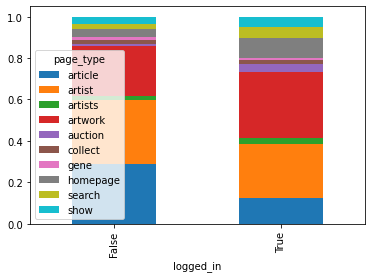

In [307]:
pivot_df.plot.bar(stacked=True)

- What are some observations you can make about users' behavior on Artsy?

In [317]:
## Doing the same analysis as before for the referrer page type
v['referrer_page_type'] = v.referrer.map(lambda t:  t if t=='others' else t.split('/')[2])
v

,anonymous_id,logged_in,received_at,path,referrer,page_type,referrer_page_type
0,ad31b961-d67f-497c-9def-9193d518863a,False,2017-03-12 18:23:28.241,/artist/anish-kapoor,http://m.facebook.com,artist,m.facebook.com
1,dd14cc5c-f31a-4591-974d-1233346b1999,False,2017-03-20 20:36:32.177,/artwork/vernon-fisher-happy-family,others,artwork,others
2,9b459a76-aaa3-44cd-9f0e-af7fb9829b2c,False,2017-03-14 05:19:47.852,/article/francesca-gavin-10-new-artists-to-wat...,https://www.google.ge/,article,www.google.ge
3,cb745df7-c90d-4339-9519-960081515b8c,False,2017-03-14 02:50:29.697,/article/artsy-editorial-8-female-surrealists-...,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,article,l.facebook.com
4,8b18968d-4e51-4e00-b60c-d80b1ad6a55c,False,2017-03-15 09:07:07.436,/article/artsy-editorial-why-these-7-artists-q...,https://www.facebook.com/,article,www.facebook.com
...,...,...,...,...,...,...,...
99995,d3916f78-16ec-4614-af92-8a29640566ce,True,2017-03-12 15:50:04.295,homepage,others,homepage,others
99996,fc6a5da2-0cc0-42f2-9040-74498c50f569,False,2017-03-23 11:11:23.208,/artists/artists-starting-with-s,https://www.artsy.net/artists/artists-starting...,artists,www.artsy.net
99997,66948dd7-836b-4770-9ca4-719096c621ee,True,2017-03-13 11:27:32.482,/artwork/jean-baptiste-bernadet-untitled-vetiv...,https://www.artsy.net/artist/jean-baptiste-ber...,artwork,www.artsy.net
99998,cca44d19-d759-493a-a59e-0ef13ac4f129,False,2017-03-21 10:33:02.154,/jobs,https://www.artsy.net/,jobs,www.artsy.net


In [319]:
## ~89% of the pageviews come from the first 10 referrer page types
v.groupby('referrer_page_type').size().nlargest(10).sum()/len(v)

0.88759

In [320]:
v.groupby('referrer_page_type').size().nlargest(10)

referrer_page_type
www.artsy.net        44682
others               19965
www.google.com        9448
m.facebook.com        4820
www.facebook.com      4645
www.google.co.uk      2248
www.google.com.au     1026
www.google.ca          814
www.google.fr          601
www.google.de          510
dtype: int64

In [322]:
v['referrer_page_type_group'] = v.referrer_page_type.map(lambda t:  t if not t.startswith('.') else t.split('.')[1])
v

,anonymous_id,logged_in,received_at,path,referrer,page_type,referrer_page_type,referrer_page_type_group
0,ad31b961-d67f-497c-9def-9193d518863a,False,2017-03-12 18:23:28.241,/artist/anish-kapoor,http://m.facebook.com,artist,m.facebook.com,m.facebook.com
1,dd14cc5c-f31a-4591-974d-1233346b1999,False,2017-03-20 20:36:32.177,/artwork/vernon-fisher-happy-family,others,artwork,others,others
2,9b459a76-aaa3-44cd-9f0e-af7fb9829b2c,False,2017-03-14 05:19:47.852,/article/francesca-gavin-10-new-artists-to-wat...,https://www.google.ge/,article,www.google.ge,www.google.ge
3,cb745df7-c90d-4339-9519-960081515b8c,False,2017-03-14 02:50:29.697,/article/artsy-editorial-8-female-surrealists-...,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,article,l.facebook.com,l.facebook.com
4,8b18968d-4e51-4e00-b60c-d80b1ad6a55c,False,2017-03-15 09:07:07.436,/article/artsy-editorial-why-these-7-artists-q...,https://www.facebook.com/,article,www.facebook.com,www.facebook.com
...,...,...,...,...,...,...,...,...
99995,d3916f78-16ec-4614-af92-8a29640566ce,True,2017-03-12 15:50:04.295,homepage,others,homepage,others,others
99996,fc6a5da2-0cc0-42f2-9040-74498c50f569,False,2017-03-23 11:11:23.208,/artists/artists-starting-with-s,https://www.artsy.net/artists/artists-starting...,artists,www.artsy.net,www.artsy.net
99997,66948dd7-836b-4770-9ca4-719096c621ee,True,2017-03-13 11:27:32.482,/artwork/jean-baptiste-bernadet-untitled-vetiv...,https://www.artsy.net/artist/jean-baptiste-ber...,artwork,www.artsy.net,www.artsy.net
99998,cca44d19-d759-493a-a59e-0ef13ac4f129,False,2017-03-21 10:33:02.154,/jobs,https://www.artsy.net/,jobs,www.artsy.net,www.artsy.net


In [332]:
searchfor=['facebook', 'google', 'artsy', 'others']
v_relevant_referrer = v[v.referrer_page_type.str.contains('|'.join(searchfor))]
v_relevant_referrer['referrer_page_type_group'] = v_relevant_referrer.referrer_page_type.map(lambda t: 'facebook' if 'facebook' in t else ('google' if 'google' in t else ('artsy' if 'artsy' in t else 'others')))
v_relevant_referrer

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,anonymous_id,logged_in,received_at,path,referrer,page_type,referrer_page_type,referrer_page_type_group
0,ad31b961-d67f-497c-9def-9193d518863a,False,2017-03-12 18:23:28.241,/artist/anish-kapoor,http://m.facebook.com,artist,m.facebook.com,facebook
1,dd14cc5c-f31a-4591-974d-1233346b1999,False,2017-03-20 20:36:32.177,/artwork/vernon-fisher-happy-family,others,artwork,others,others
2,9b459a76-aaa3-44cd-9f0e-af7fb9829b2c,False,2017-03-14 05:19:47.852,/article/francesca-gavin-10-new-artists-to-wat...,https://www.google.ge/,article,www.google.ge,google
3,cb745df7-c90d-4339-9519-960081515b8c,False,2017-03-14 02:50:29.697,/article/artsy-editorial-8-female-surrealists-...,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,article,l.facebook.com,facebook
4,8b18968d-4e51-4e00-b60c-d80b1ad6a55c,False,2017-03-15 09:07:07.436,/article/artsy-editorial-why-these-7-artists-q...,https://www.facebook.com/,article,www.facebook.com,facebook
...,...,...,...,...,...,...,...,...
99995,d3916f78-16ec-4614-af92-8a29640566ce,True,2017-03-12 15:50:04.295,homepage,others,homepage,others,others
99996,fc6a5da2-0cc0-42f2-9040-74498c50f569,False,2017-03-23 11:11:23.208,/artists/artists-starting-with-s,https://www.artsy.net/artists/artists-starting...,artists,www.artsy.net,artsy
99997,66948dd7-836b-4770-9ca4-719096c621ee,True,2017-03-13 11:27:32.482,/artwork/jean-baptiste-bernadet-untitled-vetiv...,https://www.artsy.net/artist/jean-baptiste-ber...,artwork,www.artsy.net,artsy
99998,cca44d19-d759-493a-a59e-0ef13ac4f129,False,2017-03-21 10:33:02.154,/jobs,https://www.artsy.net/,jobs,www.artsy.net,artsy


In [333]:
r_in_total = len(v_relevant_referrer[v_relevant_referrer.logged_in==1])
r_out_total = len(v_relevant_referrer[v_relevant_referrer.logged_in==0])

r_log = v_relevant_referrer[['referrer_page_type_group','logged_in']].groupby(['referrer_page_type_group','logged_in']).size().reset_index(name='views')
r_log['share'] = r_log.apply(lambda t: t['views']/r_in_total  if t['logged_in'] else t['views']/r_out_total, axis=1)

r_log

,referrer_page_type_group,logged_in,views,share
0,artsy,False,32803,0.423144
1,artsy,True,12180,0.673524
2,facebook,False,9780,0.126158
3,facebook,True,193,0.010672
4,google,False,19647,0.253438
5,google,True,1036,0.057288
6,others,False,15292,0.197260
7,others,True,4675,0.258516


In [326]:
r_pivot_df = r_log.pivot(index='logged_in', columns='referrer_page_type_group', values='share')
r_pivot_df = r_pivot_df.fillna(0)
r_pivot_df

referrer_page_type_group,artsy,facebook,google,others
logged_in,,,,
False,0.423144,0.126158,0.253438,0.197260
True,0.673524,0.010672,0.057288,0.258516


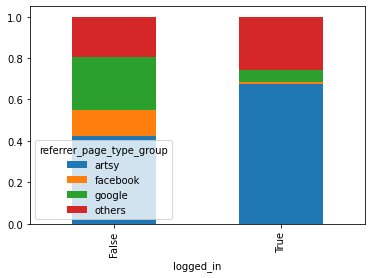

In [328]:
r_pivot_df.plot.bar(stacked=True)

### User Analysis

Predicting which users will submit inquiries on our website is an important business insight. We provide a dataset of users, some have inquired (has_inquired=True) and some haven't (has_inquired=False).

- What observations can you make about inquirers and non-inquirers's behavior based on this dataset? 

Distributtions

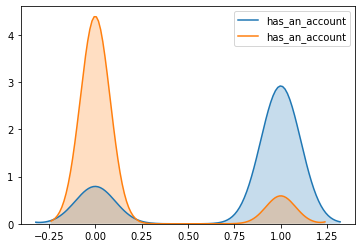

In [289]:
## by has_an_account
sns.kdeplot(u[u.has_inquired==1].has_an_account, shade=True)
sns.kdeplot(u[u.has_inquired==0].has_an_account, shade=True)

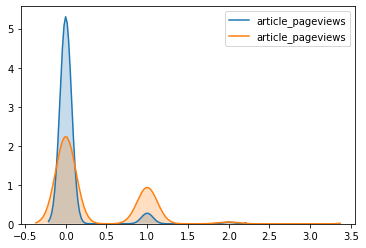

In [292]:
## by article pageviews
sns.kdeplot(u[u.has_inquired==1].article_pageviews, shade=True)
sns.kdeplot(u[u.has_inquired==0].article_pageviews, shade=True)

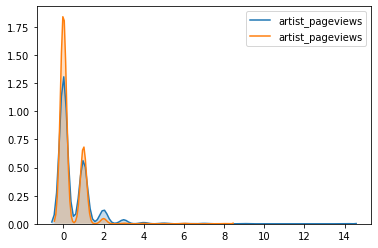

In [293]:
## by artist pageviews
sns.kdeplot(u[u.has_inquired==1].artist_pageviews, shade=True)
sns.kdeplot(u[u.has_inquired==0].artist_pageviews, shade=True)

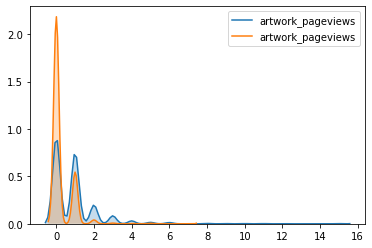

In [294]:
## by artwork pageviews
sns.kdeplot(u[u.has_inquired==1].artwork_pageviews, shade=True)
sns.kdeplot(u[u.has_inquired==0].artwork_pageviews, shade=True)

Correlation Matrix

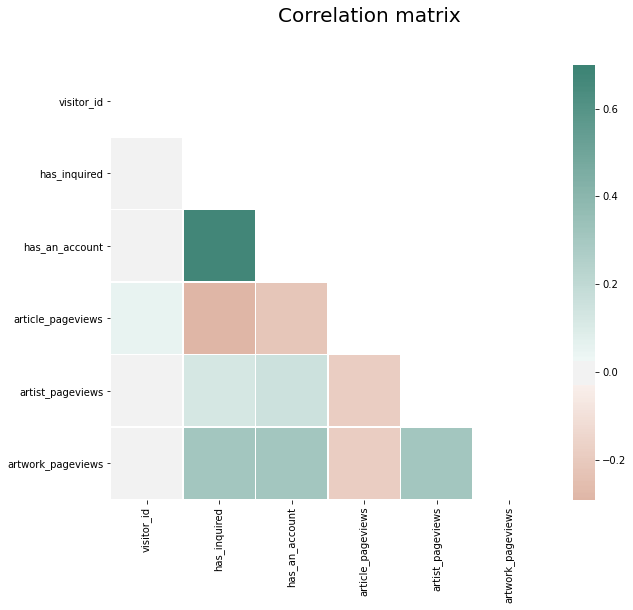

In [299]:
corr = u.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 8))
f.suptitle('Correlation matrix', fontsize=20)
cmap = sns.diverging_palette(25, 170, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.7, center=0,
            square=True, linewidths=0.3, cbar_kws={"shrink": 1})

The probability of a uer inquiring is higher if:
- has an account
- saw artwork
- saw artist
- low number of article views

- Using the Users dataset, build a machine learning model to predict who will inquire. 

There are two types of supervised machine learning algorithms: Regression and Classification. In this particular case, as we want to predict if a user will inquire or not, we will look into a decision tree classification model given the dependent variable (user inquired or not) and the independent variables: if the user has an account, if he visited an article page, an artist page or an artwork page.  

Binary Classification (we wish to group an outcome into one of two groups)

In [340]:
u['has_inquired'] = u['has_inquired'].astype(int)
u['has_an_account'] = u['has_an_account'].astype(int)
u

,visitor_id,has_inquired,has_an_account,article_pageviews,artist_pageviews,artwork_pageviews
0,0,0,0,0.0,0.0,1.0
1,1,1,0,0.0,0.0,1.0
2,2,1,1,0.0,0.0,1.0
3,3,0,0,0.0,1.0,0.0
4,4,0,0,0.0,0.0,1.0
...,...,...,...,...,...,...
2606,2606,0,0,0.0,1.0,0.0
2607,2607,1,0,0.0,1.0,0.0
2608,2608,0,0,0.0,1.0,0.0
2609,2609,0,1,0.0,0.0,0.0


In [348]:
## Define variables 
X = u[['has_an_account', 'article_pageviews', 'artist_pageviews', 'artwork_pageviews']]
y = u[['has_inquired']]

In [349]:
## Create the Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
## Scale the datasets as numerical values do not have the same scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [344]:
## Create my classification model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

- Evaluate the performance of your model.

In [347]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.85
Accuracy of Decision Tree classifier on test set: 0.83


Compare with other models

In [355]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.84
Accuracy of Logistic regression classifier on test set: 0.83


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [356]:
## K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.72


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [357]:
##Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.84
Accuracy of LDA classifier on test set: 0.83


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [359]:
##Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.83
Accuracy of GNB classifier on test set: 0.82


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [360]:
## Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.84
Accuracy of SVM classifier on test set: 0.83


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

